***
# Model Deployment : Classifying Brain Tumors from Magnetic Resonance Images by Leveraging Convolutional Neural Network-Based Multilevel Feature Extraction and Hierarchical Representation 

***
### [**John Pauline Pineda**](https://github.com/JohnPaulinePineda) <br> <br> *November 30, 2024*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Predictive Model Development](#1.6)
        * [1.6.1 Pre-Modelling Data Preparation](#1.6.1)
        * [1.6.2 Data Splitting](#1.6.2)
        * [1.6.3 Convolutional Neural Network Sequential Layer Development](#1.6.3)
            * [1.6.3.1 CNN With No Regularization](#1.6.3.1)
            * [1.6.3.2 CNN With Dropout Regularization](#1.6.3.2)
            * [1.6.3.3 CNN With Batch Normalization Regularization](#1.6.3.3)
            * [1.6.3.4 CNN With Dropout and Batch Normalization Regularization](#1.6.3.4)
        * [1.6.4 CNN With No Regularization Model Fitting | Hyperparameter Tuning | Validation](#1.6.4)
        * [1.6.5 CNN With Dropout Regularization Model Fitting | Hyperparameter Tuning | Validation](#1.6.5)
        * [1.6.6 CNN With Batch Normalization Regularization Model Fitting | Hyperparameter Tuning | Validation](#1.6.6)
        * [1.6.7 CNN With Dropout and Batch Normalization Regularization Model Fitting | Hyperparameter Tuning | Validation](#1.6.7)
        * [1.6.8 Model Selection](#1.6.8)
        * [1.6.9 Model Testing](#1.6.9)
        * [1.6.10 Model Inference](#1.6.10)
    * [1.7 Predictive Model Deployment Using Streamlit and Streamlit Community Cloud](#1.7)
        * [1.7.1 Model Application Programming Interface Code Development](#1.7.1)
        * [1.7.2 User Interface Application Code Development](#1.7.2)
        * [1.7.3 Web Application](#1.7.3)
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

# 1. Table of Contents <a class="anchor" id="TOC"></a>

## 1.1 Data Background <a class="anchor" id="1.1"></a>

## 1.2 Data Description <a class="anchor" id="1.2"></a>

In [1]:
##################################
# Loading Python Libraries
##################################

##################################
# Data Loading, Data Preprocessing
# and Exploratory Data Analysis
##################################
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline

import tensorflow as tf
import keras

from PIL import Image
from glob import glob
import cv2
import os
import random
import math

##################################
# Model Development
##################################
from keras import backend as K
from keras import regularizers
from keras.models import Sequential, Model,load_model
from keras.layers import Input, Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D, AveragePooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img

##################################
# Model Evaluation
##################################
from keras.metrics import PrecisionAtRecall, Recall 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


In [2]:
##################################
# Setting random seed options
# for the analysis
##################################
def set_seed(seed=123):
    np.random.seed(seed) 
    tf.random.set_seed(seed) 
    keras.utils.set_random_seed(seed)
    random.seed(seed)
    tf.config.experimental.enable_op_determinism()
    os.environ['TF_DETERMINISTIC_OPS'] = "1"
    os.environ['TF_CUDNN_DETERMINISM'] = "1"
    os.environ['PYTHONHASHSEED'] = str(seed)
set_seed()


In [3]:
##################################
# Filtering out unncessary warnings
##################################
import warnings
warnings.filterwarnings('ignore')


In [4]:
##################################
# Defining file paths
##################################
DATASETS_ORIGINAL_PATH = r"datasets\Brain_Tumor_MRI_Dataset"
DATASETS_FINAL_TRAIN_PATH = r"datasets\Brain_Tumor_MRI_Dataset\Training"
DATASETS_FINAL_TEST_PATH = r"datasets\Brain_Tumor_MRI_Dataset\Testing"
MODELS_PATH = r"models"
PARAMETERS_PATH = r"parameters"
PIPELINES_PATH = r"pipelines"


In [5]:
##################################
# Defining the image category levels
##################################
diagnosis_code_dictionary = {'Tr-no': 0,
                             'Tr-noTr': 0,
                             'Tr-gl': 1,
                             'Tr-glTr': 1,
                             'Tr-me': 2,
                             'Tr-meTr': 2,
                             'Tr-pi': 3,
                             'Tr-piTr': 3}

##################################
# Defining the image category descriptions
##################################
diagnosis_description_dictionary = {'Tr-no': 'No Tumor',
                                    'Tr-noTr': 'No Tumor',
                                    'Tr-gl': 'Glioma',
                                    'Tr-glTr': 'Glioma',
                                    'Tr-me': 'Meningioma',
                                    'Tr-meTr': 'Meningioma',
                                    'Tr-pi': 'Pituitary',
                                    'Tr-piTr': 'Pituitary'}

##################################
# Consolidating the image path
##################################
imageid_path_dictionary = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join("..", DATASETS_FINAL_TRAIN_PATH, '*','*.jpg'))}


In [6]:
##################################
# Taking a snapshot of the dictionary
##################################
dict(list(imageid_path_dictionary.items())[0:5]) 


{'Tr-glTr_0000': '..\\datasets\\Brain_Tumor_MRI_Dataset\\Training\\glioma\\Tr-glTr_0000.jpg',
 'Tr-glTr_0001': '..\\datasets\\Brain_Tumor_MRI_Dataset\\Training\\glioma\\Tr-glTr_0001.jpg',
 'Tr-glTr_0002': '..\\datasets\\Brain_Tumor_MRI_Dataset\\Training\\glioma\\Tr-glTr_0002.jpg',
 'Tr-glTr_0003': '..\\datasets\\Brain_Tumor_MRI_Dataset\\Training\\glioma\\Tr-glTr_0003.jpg',
 'Tr-glTr_0004': '..\\datasets\\Brain_Tumor_MRI_Dataset\\Training\\glioma\\Tr-glTr_0004.jpg'}

In [7]:
##################################
# Consolidating the information
# from the dataset
# into a dataframe
##################################
mri_images = pd.DataFrame.from_dict(imageid_path_dictionary, orient = 'index').reset_index()
mri_images.columns = ['Image_ID','Path']
classes = mri_images.Image_ID.str.split('_').str[0]
mri_images['Diagnosis'] = classes
mri_images['Target'] = mri_images['Diagnosis'].map(diagnosis_code_dictionary.get) 
mri_images['Class'] = mri_images['Diagnosis'].map(diagnosis_description_dictionary.get) 


In [8]:
##################################
# Performing a general exploration of the dataset
##################################
print('Dataset Dimensions: ')
display(mri_images.shape)


Dataset Dimensions: 


(5712, 5)

In [9]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(mri_images.dtypes)


Column Names and Data Types:


Image_ID     object
Path         object
Diagnosis    object
Target        int64
Class        object
dtype: object

In [10]:
##################################
# Taking a snapshot of the dataset
##################################
mri_images.head()


,Image_ID,Path,Diagnosis,Target,Class
0,Tr-glTr_0000,..\datasets\Brain_Tumor_MRI_Dataset\Training\g...,Tr-glTr,1,Glioma
1,Tr-glTr_0001,..\datasets\Brain_Tumor_MRI_Dataset\Training\g...,Tr-glTr,1,Glioma
2,Tr-glTr_0002,..\datasets\Brain_Tumor_MRI_Dataset\Training\g...,Tr-glTr,1,Glioma
3,Tr-glTr_0003,..\datasets\Brain_Tumor_MRI_Dataset\Training\g...,Tr-glTr,1,Glioma
4,Tr-glTr_0004,..\datasets\Brain_Tumor_MRI_Dataset\Training\g...,Tr-glTr,1,Glioma


In [11]:
##################################
# Performing a general exploration of the numeric variables
##################################
print('Numeric Variable Summary:')
display(mri_images.describe(include='number').transpose())


Numeric Variable Summary:


,count,mean,std,min,25%,50%,75%,max
Target,5712.0,1.465336,1.147892,0.0,0.0,1.0,3.0,3.0


In [12]:
##################################
# Performing a general exploration of the object variable
##################################
print('Object Variable Summary:')
display(mri_images.describe(include='object').transpose())


Object Variable Summary:


,count,unique,top,freq
Image_ID,5712,5712,Tr-pi_1440,1
Path,5712,5712,..\datasets\Brain_Tumor_MRI_Dataset\Training\p...,1
Diagnosis,5712,8,Tr-no,1585
Class,5712,4,No Tumor,1595


In [13]:
##################################
# Performing a general exploration of the target variable
##################################
mri_images.Class.value_counts()


Class
No Tumor      1595
Pituitary     1457
Meningioma    1339
Glioma        1321
Name: count, dtype: int64

In [14]:
##################################
# Performing a general exploration of the target variable
##################################
mri_images.Class.value_counts(normalize=True)


Class
No Tumor      0.279237
Pituitary     0.255077
Meningioma    0.234419
Glioma        0.231268
Name: proportion, dtype: float64

## 1.3 Data Quality Assessment <a class="anchor" id="1.3"></a>

In [15]:
##################################
# Counting the number of duplicated images
##################################
mri_images.duplicated().sum()


np.int64(0)

In [16]:
##################################
# Gathering the number of null images
##################################
mri_images.isnull().sum()


Image_ID     0
Path         0
Diagnosis    0
Target       0
Class        0
dtype: int64

## 1.4 Data Preprocessing <a class="anchor" id="1.4"></a>

In [17]:
##################################
# Including the pixel information
# of the actual images
# in array format
# into a dataframe
##################################
mri_images['Image'] = mri_images['Path'].map(lambda x: np.asarray(Image.open(x).resize((75,75))))


In [18]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(mri_images.dtypes)


Column Names and Data Types:


Image_ID     object
Path         object
Diagnosis    object
Target        int64
Class        object
Image        object
dtype: object

In [19]:
##################################
# Taking a snapshot of the dataset
##################################
mri_images.head()


,Image_ID,Path,Diagnosis,Target,Class,Image
0,Tr-glTr_0000,..\datasets\Brain_Tumor_MRI_Dataset\Training\g...,Tr-glTr,1,Glioma,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Tr-glTr_0001,..\datasets\Brain_Tumor_MRI_Dataset\Training\g...,Tr-glTr,1,Glioma,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Tr-glTr_0002,..\datasets\Brain_Tumor_MRI_Dataset\Training\g...,Tr-glTr,1,Glioma,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Tr-glTr_0003,..\datasets\Brain_Tumor_MRI_Dataset\Training\g...,Tr-glTr,1,Glioma,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,Tr-glTr_0004,..\datasets\Brain_Tumor_MRI_Dataset\Training\g...,Tr-glTr,1,Glioma,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


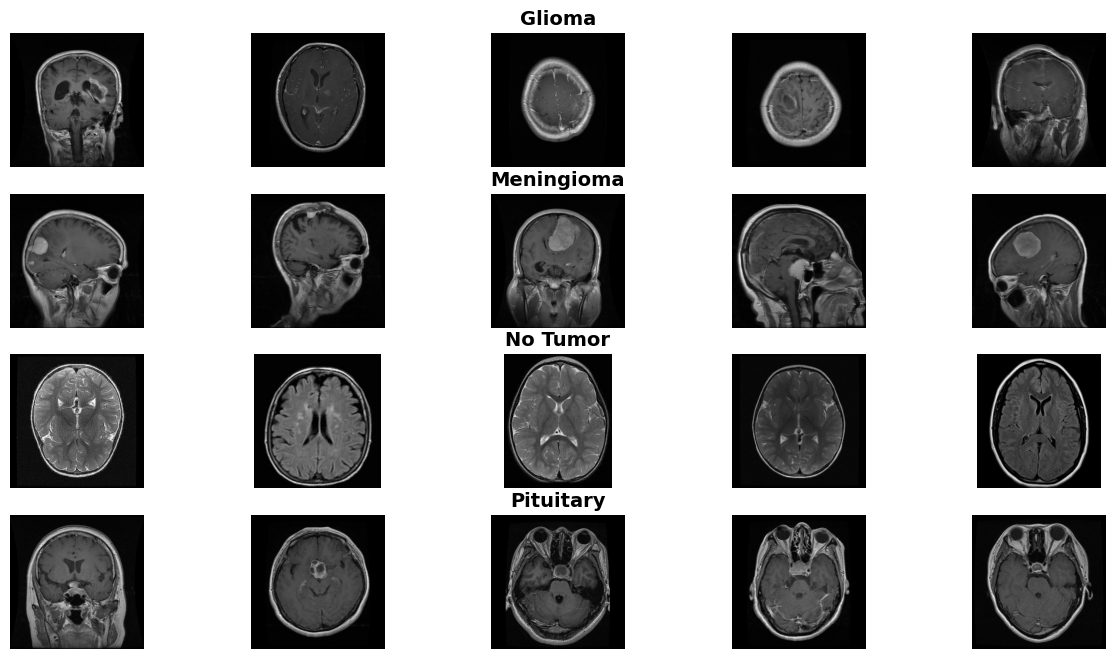

In [20]:
##################################
# Taking a snapshot of the dataset
##################################
n_samples = 5
fig, m_axs = plt.subplots(4, n_samples, figsize = (3*n_samples, 8))
for n_axs, (type_name, type_rows) in zip(m_axs, mri_images.sort_values(['Class']).groupby('Class')):
    n_axs[2].set_title(type_name, fontsize = 14, weight = 'bold')
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=123).iterrows()):       
        picture = c_row['Path']
        image = cv2.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')
        

In [21]:
##################################
# Sampling a single image
##################################
samples, features = mri_images.shape
plt.figure()
pic_id = random.randrange(0, samples)
picture = mri_images['Path'][pic_id]
image = cv2.imread(picture) 


<Figure size 640x480 with 0 Axes>

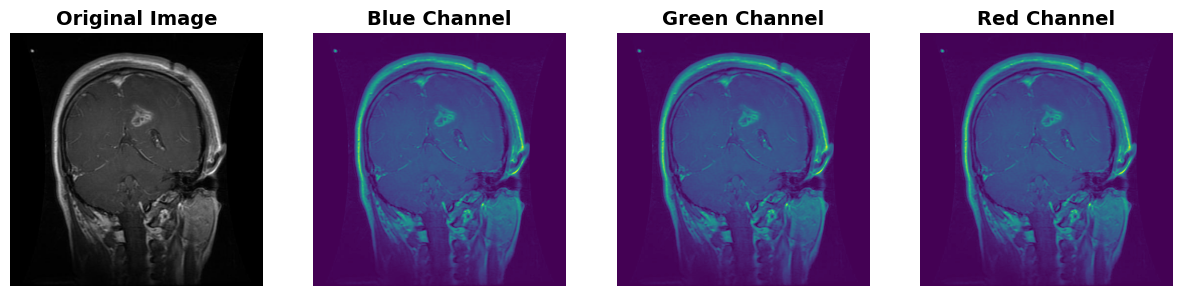

In [22]:
##################################
# Plotting using subplots
##################################
plt.figure(figsize=(15, 5))

##################################
# Formulating the original image
##################################
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original Image', fontsize = 14, weight = 'bold')
plt.axis('off')

##################################
# Formulating the blue channel
##################################
plt.subplot(1, 4, 2)
plt.imshow(image[ : , : , 0])
plt.title('Blue Channel', fontsize = 14, weight = 'bold')
plt.axis('off')

##################################
# Formulating the green channel
##################################
plt.subplot(1, 4, 3)
plt.imshow(image[ : , : , 1])
plt.title('Green Channel', fontsize = 14, weight = 'bold')
plt.axis('off')

##################################
# Formulating the red channel
##################################
plt.subplot(1, 4, 4)
plt.imshow(image[ : , : , 2])
plt.title('Red Channel', fontsize = 14, weight = 'bold')
plt.axis('off')

##################################
# Consolidating all images
##################################
plt.show()


In [23]:
##################################
# Determining the image shape
##################################
print('Image Shape:')
display(image.shape)


Image Shape:


(512, 512, 3)

In [24]:
##################################
# Determining the image height
##################################
print('Image Height:')
display(image.shape[0])


Image Height:


512

In [25]:
##################################
# Determining the image width
##################################
print('Image Width:')
display(image.shape[1])


Image Width:


512

In [26]:
##################################
# Determining the image dimension
##################################
print('Image Dimension:')
display(image.ndim)


Image Dimension:


3

In [27]:
##################################
# Determining the image size
##################################
print('Image Size:')
display(image.size)


Image Size:


786432

In [28]:
##################################
# Determining the image data type
##################################
print('Image Data Type:')
display(image.dtype)


Image Data Type:


dtype('uint8')

In [29]:
##################################
# Determining the maximum RGB value
##################################
print('Image Maximum RGB:')
display(image.max())


Image Maximum RGB:


np.uint8(255)

In [30]:
##################################
# Determining the minimum RGB value
##################################
print('Image Minimum RGB:')
display(image.min())


Image Minimum RGB:


np.uint8(0)

## 1.5 Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis <a class="anchor" id="1.5.1"></a>

### 1.5.2 Hypothesis Testing <a class="anchor" id="1.5.2"></a>

## 1.6 Predictive Model Development <a class="anchor" id="1.6"></a>

### 1.6.1 Pre-Modelling Data Preparation <a class="anchor" id="1.6.1"></a>

### 1.6.2 Data Splitting <a class="anchor" id="1.6.2"></a>

### 1.6.3 Convolutional Neural Network Sequential Layer Development <a class="anchor" id="1.6.3"></a>

#### 1.6.3.1 CNN With No Regularization <a class="anchor" id="1.6.3.1"></a>

#### 1.6.3.2 CNN With Dropout Regularization <a class="anchor" id="1.6.3.2"></a>

#### 1.6.3.3 CNN With Batch Normalization Regularization <a class="anchor" id="1.6.3.3"></a>

#### 1.6.3.4 CNN With Dropout and Batch Normalization Regularization <a class="anchor" id="1.6.3.4"></a>

### 1.6.4 CNN With No Regularization Model Fitting | Hyperparameter Tuning | Validation <a class="anchor" id="1.6.4"></a>

### 1.6.5 CNN With Dropout Regularization Model Fitting | Hyperparameter Tuning | Validation <a class="anchor" id="1.6.5"></a>

### 1.6.6 CNN With Batch Normalization Regularization Model Fitting | Hyperparameter Tuning | Validation <a class="anchor" id="1.6.6"></a>

### 1.6.7 CNN With Dropout and Batch Normalization Regularization Model Fitting | Hyperparameter Tuning | Validation <a class="anchor" id="1.6.7"></a>

### 1.6.8 Model Selection <a class="anchor" id="1.6.8"></a>

### 1.6.9 Model Testing <a class="anchor" id="1.6.9"></a>

### 1.6.10 Model Inference <a class="anchor" id="1.6.10"></a>

## 1.7 Predictive Model Development <a class="anchor" id="1.7"></a>

### 1.7.1 Model Application Programming Interface Code Development <a class="anchor" id="1.7.1"></a>

### 1.7.2 User Interface Application Code Development <a class="anchor" id="1.7.2"></a>

### 1.7.3 Web Application <a class="anchor" id="1.7.3"></a>

# 2. Summary <a class="anchor" id="Summary"></a>

# 3. References <a class="anchor" id="References"></a>
* **[Book]** [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) by Francois Chollet
* **[Book]** [Deep Learning: A Visual Approach](https://nostarch.com/deep-learning-visual-approach) by Andrew Glassner
* **[Book]** [Learning Deep Learning](https://ldlbook.com/) by Magnus Ekman
* **[Book]** [Practical Deep Learning](https://nostarch.com/practical-deep-learning-python) by Ronald Kneusel
* **[Book]** [Deep Learning with Tensorflow and Keras](https://www.packtpub.com/product/deep-learning-with-tensorflow-and-keras-third-edition/9781803232911) by Amita Kapoor, Antonio Gulli and Sujit Pal
* **[Book]** [Deep Learning](https://mitpress.mit.edu/9780262537551/deep-learning/) by John Kelleher
* **[Book]** [Generative Deep Learning](https://www.oreilly.com/library/view/generative-deep-learning/9781098134174/) by David Foster
* **[Book]** [Deep Learning Illustrated](https://www.deeplearningillustrated.com/) by John Krohn, Grant Beyleveld and Aglae Bassens
* **[Book]** [Neural Networks and Deep Learning](https://link.springer.com/book/10.1007/978-3-319-94463-0) by Charu Aggarwal
* **[Book]** [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) by Andrew Trask
* **[Book]** [Deep Learning with Pytorch](https://www.manning.com/books/deep-learning-with-pytorch) by Eli Stevens, Luca Antiga and Thomas Viehmann
* **[Book]** [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio and Aaron Courville
* **[Book]** [Deep Learning from Scratch](https://www.oreilly.com/library/view/deep-learning-from/9781492041405/) by Seth Weidman
* **[Book]** [Fundamentals of Deep Learning](https://www.oreilly.com/library/view/fundamentals-of-deep/9781492082170/) by Nithin Buduma, Nikhil Buduma and Joe Papa
* **[Book]** [Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurelien Geron
* **[Book]** [Deep Learning for Computer Vision](https://machinelearningmastery.com/deep-learning-for-computer-vision/) by Jason Brownlee
* **[Python Library API]** [numpy](https://numpy.org/doc/) by NumPy Team
* **[Python Library API]** [pandas](https://pandas.pydata.org/docs/) by Pandas Team
* **[Python Library API]** [seaborn](https://seaborn.pydata.org/) by Seaborn Team
* **[Python Library API]** [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) by MatPlotLib Team
* **[Python Library API]** [matplotlib.image](https://matplotlib.org/stable/api/image_api.html) by MatPlotLib Team
* **[Python Library API]** [matplotlib.offsetbox](https://matplotlib.org/stable/api/offsetbox_api.html) by MatPlotLib Team
* **[Python Library API]** [tensorflow](https://pypi.org/project/tensorflow/) by TensorFlow Team
* **[Python Library API]** [keras](https://pypi.org/project/keras/) by Keras Team
* **[Python Library API]** [pil](https://pypi.org/project/Pillow/) by Pillow Team
* **[Python Library API]** [glob](https://docs.python.org/3/library/glob.html) by glob Team
* **[Python Library API]** [cv2](https://pypi.org/project/opencv-python/) by OpenCV Team
* **[Python Library API]** [os](https://docs.python.org/3/library/os.html) by os Team
* **[Python Library API]** [random](https://docs.python.org/3/library/random.html) by random Team
* **[Python Library API]** [keras.models](https://www.tensorflow.org/api_docs/python/tf/keras/models) by TensorFlow Team
* **[Python Library API]** [keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) by TensorFlow Team
* **[Python Library API]** [keras.wrappers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Wrapper) by TensorFlow Team
* **[Python Library API]** [keras.utils](https://www.tensorflow.org/api_docs/python/tf/keras/utils) by TensorFlow Team
* **[Python Library API]** [keras.optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) by TensorFlow Team
* **[Python Library API]** [keras.preprocessing.image](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image) by TensorFlow Team
* **[Python Library API]** [keras.callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) by TensorFlow Team
* **[Python Library API]** [keras.metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) by TensorFlow Team
* **[Python Library API]** [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) by Scikit-Learn Team
* **[Article]** [Convolutional Neural Networks, Explained](https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939) by Mayank Mishra (Towards Data Science)
* **[Article]** [A Comprehensive Guide to Convolutional Neural Networks — the ELI5 way](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) by Sumit Saha (Towards Data Science)
* **[Article]** [Understanding Convolutional Neural Networks: A Beginner’s Journey into the Architecture](https://medium.com/codex/understanding-convolutional-neural-networks-a-beginners-journey-into-the-architecture-aab30dface10) by Afaque Umer (Medium)
* **[Article]** [Introduction to Convolutional Neural Networks (CNN)](https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/) by Manav Mandal (Analytics Vidhya)
* **[Article]** [What Are Convolutional Neural Networks?](https://www.ibm.com/topics/convolutional-neural-networks) by IBM Team (IBM)
* **[Article]** [What is CNN? A 5 Year Old guide to Convolutional Neural Network](https://medium.com/analytics-vidhya/what-is-cnn-a-5-year-old-guide-to-convolutional-neural-network-c9d0338c3bf7) by William Ong (Medium)
* **[Article]** [Convolutional Neural Network](https://deepai.org/machine-learning-glossary-and-terms/convolutional-neural-network) by Thomas Wood (DeepAI.Org)
* **[Article]** [How Do Convolutional Layers Work in Deep Learning Neural Networks?](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Convolutional Neural Networks Explained: Using PyTorch to Understand CNNs](https://builtin.com/data-science/convolutional-neural-networks-explained) by Vihar Kurama (BuiltIn)
* **[Article]** [Convolutional Neural Networks Cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks) by Afshine Amidi and Shervine Amidi (Stanford University)
* **[Article]** [An Intuitive Explanation of Convolutional Neural Networks](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/) by Ujjwal Karn (The Data Science Blog)
* **[Article]** [Convolutional Neural Network](https://www.nvidia.com/en-us/glossary/data-science/convolutional-neural-network/) by NVIDIA Team (NVIDIA)
* **[Article]** [Convolutional Neural Networks (CNN) Overview](https://encord.com/blog/convolutional-neural-networks-explained/) by Nikolaj Buhl (Encord)
* **[Article]** [Understanding Convolutional Neural Network (CNN): A Complete Guide](https://learnopencv.com/understanding-convolutional-neural-networks-cnn/) by LearnOpenCV Team (LearnOpenCV)
* **[Article]** [Convolutional Neural Networks (CNNs) and Layer Types](https://pyimagesearch.com/2021/05/14/convolutional-neural-networks-cnns-and-layer-types/) by Adrian Rosebrock (PyImageSearch)
* **[Article]** [How Convolutional Neural Networks See The World](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html) by Francois Chollet (The Keras Blog)
* **[Article]** [What Is a Convolutional Neural Network?](https://www.mathworks.com/discovery/convolutional-neural-network-matlab.html#:~:text=A%20convolutional%20neural%20network%20(CNN,%2Dseries%2C%20and%20signal%20data.) by MathWorks Team (MathWorks)
* **[Article]** [Grad-CAM Class Activation Visualization](https://keras.io/examples/vision/grad_cam/) by Francois Chollet (Keras.IO)
* **[Article]** [Grad-CAM: Visualize Class Activation Maps with Keras, TensorFlow, and Deep Learning](https://pyimagesearch.com/2020/03/09/grad-cam-visualize-class-activation-maps-with-keras-tensorflow-and-deep-learning/) by Adrian Rosebrock (PyImageSearch)
* **[Kaggle Project]** [Covid 19 Radiography Data - EDA and CNN Model](https://www.kaggle.com/code/jnegrini/covid-19-radiography-data-eda-and-cnn-model) by Juliana Negrini De Araujo (Kaggle)
* **[Kaggle Project]** [Pneumonia Detection using CNN (92.6% Accuracy)](https://www.kaggle.com/code/madz2000/pneumonia-detection-using-cnn-92-6-accuracy) by Madhav Mathur (Kaggle)
* **[Kaggle Project]** [COVID Detection from CXR Using Explainable CNN](https://www.kaggle.com/code/sid321axn/covid-detection-from-cxr-using-explainable-cnn) by Manu Siddhartha (Kaggle)
* **[Kaggle Project]** [Class Activation Mapping for COVID-19 CNN](https://www.kaggle.com/code/amyjang/class-activation-mapping-for-covid-19-cnn) by Amy Zhang (Kaggle)
* **[Kaggle Project]** [CNN mri COVID Classification](https://www.kaggle.com/code/gabrielmino/cnn-mri-covid-classification) by Gabriel Mino (Kaggle)
* **[Kaggle Project]** [Detecting-Covid-19-Images | CNN](https://www.kaggle.com/code/felipeoliveiraml/detecting-covid-19-images-cnn) by Felipe Oliveira (Kaggle)
* **[Kaggle Project]** [Detection of Covid Positive Cases using DL](https://www.kaggle.com/code/sana306/detection-of-covid-positive-cases-using-dl) by Sana Shaikh (Kaggle)
* **[Kaggle Project]** [Deep Learning and Transfer Learning on COVID-19](https://www.kaggle.com/code/digvijayyadav/deep-learning-and-transfer-learning-on-covid-19) by Digvijay Yadav (Kaggle)
* **[Kaggle Project]** [X-ray Detecting Using CNN](https://www.kaggle.com/code/shivan118/x-ray-detecting-using-cnn) by Shivan Kumar (Kaggle)
* **[Kaggle Project]** [Classification of COVID-19 using CNN](https://www.kaggle.com/code/islamselim/classification-of-covid-19-using-cnn) by Islam Selim (Kaggle)
* **[Kaggle Project]** [COVID-19 - Revisiting Pneumonia Detection](https://www.kaggle.com/code/pcbreviglieri/covid-19-revisiting-pneumonia-detection) by Paulo Breviglieri (Kaggle)
* **[Kaggle Project]** [Multi-Class X-ray Covid19 Classification-94% Accurary](https://www.kaggle.com/code/derrelldsouza/multi-class-x-ray-covid19-classification-94-acc) by Quadeer Shaikh (Kaggle)
* **[Kaggle Project]** [Grad-CAM: What Do CNNs See?](https://www.kaggle.com/code/quadeer15sh/grad-cam-what-do-cnns-see) by Derrel Souza (Kaggle)
* **[GitHub Project]** [Grad-CAM](https://github.com/ismailuddin/gradcam-tensorflow-2/blob/master/notebooks/GradCam.ipynb) by Ismail Uddin (GitHub)
* **[Publication]** [Gradient-Based Learning Applied to Document Recognition](https://ieeexplore.ieee.org/document/726791) by Yann LeCun, Leon Bottou, Yoshua Bengio and Patrick Haffner (Proceedings of the IEEE)
* **[Publication]** [Learning Deep Features for Discriminative Localization](https://arxiv.org/abs/1512.04150) by Bolei Zhou, Aditya Khosla, Agata Lapedriza, Aude Oliva and Antonio Torralba (Computer Vision and Pattern Recognition)
* **[Publication]** [Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization](https://arxiv.org/abs/1610.02391) by Ramprasaath Selvaraju, Michael Cogswell, Abhishek Das, Ramakrishna Vedantam, Devi Parikh and Dhruv Batra (Computer Vision and Pattern Recognition)
* **[Course]** [IBM Data Analyst Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-analyst) by IBM Team (Coursera)
* **[Course]** [IBM Data Science Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-science) by IBM Team (Coursera)
* **[Course]** [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning) by IBM Team (Coursera)

In [31]:
from IPython.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 15px; font-family: 'Trebuchet MS'; }</style>"))